# Machine Learning Engineer Nanodegree

## Project: Predict Boston House Prices
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

In [2]:
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.average(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation
We are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


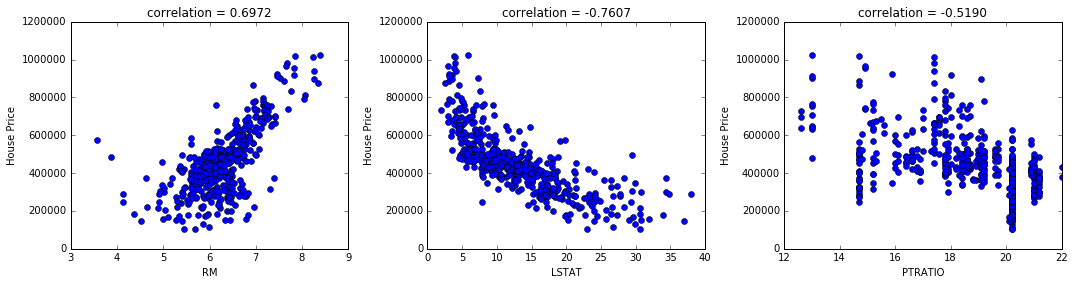

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,4))
axis_names=['RM','LSTAT','PTRATIO']
for i in [1,2,3]:
    ax=fig.add_subplot(1,3,i)
    plt.plot(features[axis_names[i-1]], prices, "o")
    plt.ylabel('House Price')
    plt.xlabel(axis_names[i-1])
    plt.tight_layout(pad=1.0, h_pad=None, w_pad=None, rect=None)
    plt.title('correlation = {:.4f}'.format(prices.corr(features[axis_names[i-1]])))

By looking at the above scatter plots and corresponding correlation values it can be seen that,
- Increase in RM will increase the MEDV since having more rooms will increase the house value.
- Increase in LSTAT will decrease the MEDV since poor homeowners cannot afford expensive houses.
- Low student to teacher ratio means more teachers per student which is a sign of a good school, so if PTRATIO is low that will result in an increased MEDV.

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in our predictions.

### Define a Performance Metric
For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._


In [4]:
#Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Shuffle and Split Data
Next we will split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [6]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

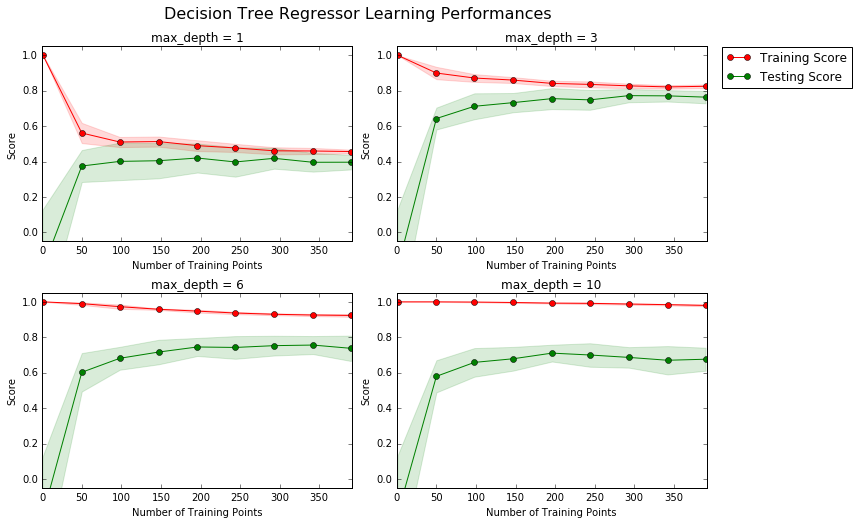

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

For a low number of training points, the model will be able to memorize the training data and give a high training score. But when the number of training points increase memorization will decrease and the training score will decrease. On the other hand for a low number of training points model will not have trained sufficiently and will result in a low testing score. But, when increasing the training points, model will train with more examples and result in an increased testing score. But further increasing the number of training points will not increase the testing score significantly.

### Complexity Curves
The following graph shows the graph for a decision tree model that has been trained and validated on the training data using different maximum depths.

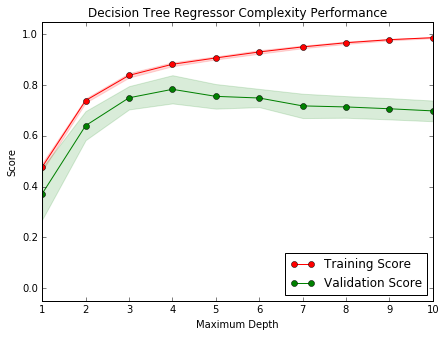

In [8]:
vs.ModelComplexity(X_train, y_train)

When the maximum depth is 1 the model suffers from high bias since decision based on one feature will have high bias. In the graph of depth 1 it can be seen that both train and test scores are low. On the other hand when the max depth is 10, model becomes overly complex and increases its variance. On the graph this can be seen by high scores for training data but low scores for validation data.

-----

## Evaluating Model Performance


### Grid Search

In grid search multiple parameters are changed systematically such that we use all the possible combinations of the parameter values (Grid search is exhaustive). Grid search space is the parameter space that’s being evaluated to optimize the model, number of dimensions in grid search space depends on the number of parameters being changed. When evaluating only one parameter grid search space is 1-dimensional, when evaluating two parameters grid search space is 2-dimensional, when evaluating n parameters grid search space is n-dimensional. Output of the gird search is the set of parameter values resulted in the highest accuracy.  Grid search algorithm is guided by some performance metric that measures the accuracy of the model for the validation set.


### Cross-Validation

In k-fold cross validation technique the training set is divided in to k bins and k different models are trained at each grid point using each bin as the validation set and others as the training set. Then the accuracy score from all k models are averaged to get the final accuracy at the grid point. Finally we can select the grid point with highest accuracy to obtain the optimum parameters. This method finds the unbiased optimum parameters generalized to the entire training and validation sets since it uses the entire dataset for the training and validation without being dependent on how they are split.

### Implementation: Fitting a Model
We will train a model using the **decision tree algorithm**and optimize the `'max_depth'` parameter for the decision tree using grid search. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

In [9]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Optimal Model

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### Predicting Selling Prices
We will use our trained model and information from three clients to predict their house prices.

| Feature | House 1 | House 2 | House 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


In [11]:

client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


### Analyze the results

In [12]:
features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


In [13]:
prices.describe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

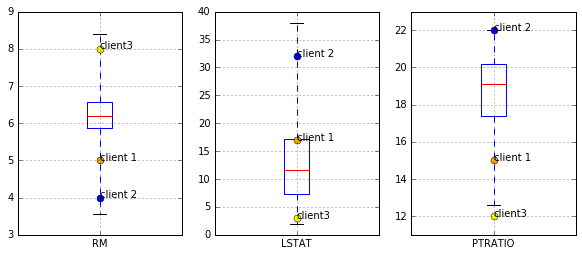

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,4))
labels=['client 1','client 2','client3']
y_ax=[[3,9],[0,40],[11,23]]
for i in [1,2,3]:
    ax=fig.add_subplot(1,3,i)
    features.boxplot(column=features.columns[i-1], showfliers=False,return_type='axes',whis='range')
    for j in [0,1,2]:
        plt.plot(1, client_data[j][i-1], mfc = ["orange","blue","yellow"][j], ms=7, marker="o", linestyle="None")
        plt.annotate(labels[j],xy=(1,client_data[j][i-1]))
    plt.ylim(y_ax[i-1])
        

Looking at the client-1's house we can see that it has:
- 5 rooms which is below the average of 6.2.
- Neighborhood  poverty level of 17% which is above average of 12.9%.
- PTratio of 15 which is below the average of 18.5.

Considering above factors the predicted price of \$406,933.33 which is below the average of \$454,300.00 seems reasonable for client-1's house and I would recommend a price of \$410,000.00.

Looking at the client-2's house we can see that it has:
- 4 rooms which is slightly above the minimum of 3.56.
- Neighborhood poverty level of 32% which is very high compared to the average of 12.9%.
- PTratio of 22 which is the maximum of the dataset.

Considering above factors the predicted price of \$232,200.00 seems reasonable for client-2's house and I would recommend a price of \$235,000.00.

Looking at the client-3's house we can see that it has:
- 8 rooms which is slightly less than the maximum of 8.398.
- Neighborhood poverty level of 3% which is very low compared to the average of 12.9%.
- PTratio of 12 which is the below the minimum of the dataset.

Considering above factors the predicted price of \$938,053.85 seems reasonable for client-3's house and I would recommend a price of \$940,000.00.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable. We run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [16]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


This model should be further improved before using in a real-world setting. Even after scaling for market inflation, housing prices data collected in 1978 will not represent the current market condition, for example the depreciation of the house price over time or out dated style etc. More features such as house type, build year, location, Square footage should be included in the model. If the model will be used in areas other than Boston, it has to be trained with data from those areas as well. 